# Initilization

In [64]:
base_folder = '/home/nbuser/'

# Imports

In [110]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing

# Data Loading

In [66]:
data = pd.read_csv(base_folder + 'train.csv')

In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Insight

In [68]:
data.describe()
# this shows that all the variables are similar in number but not the age
# so probably it contains missing entries

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Filling missing entries

In [69]:
# filled the empty age with median value of age
data['Age'].fillna(data['Age'].median(), inplace=True)

In [70]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()

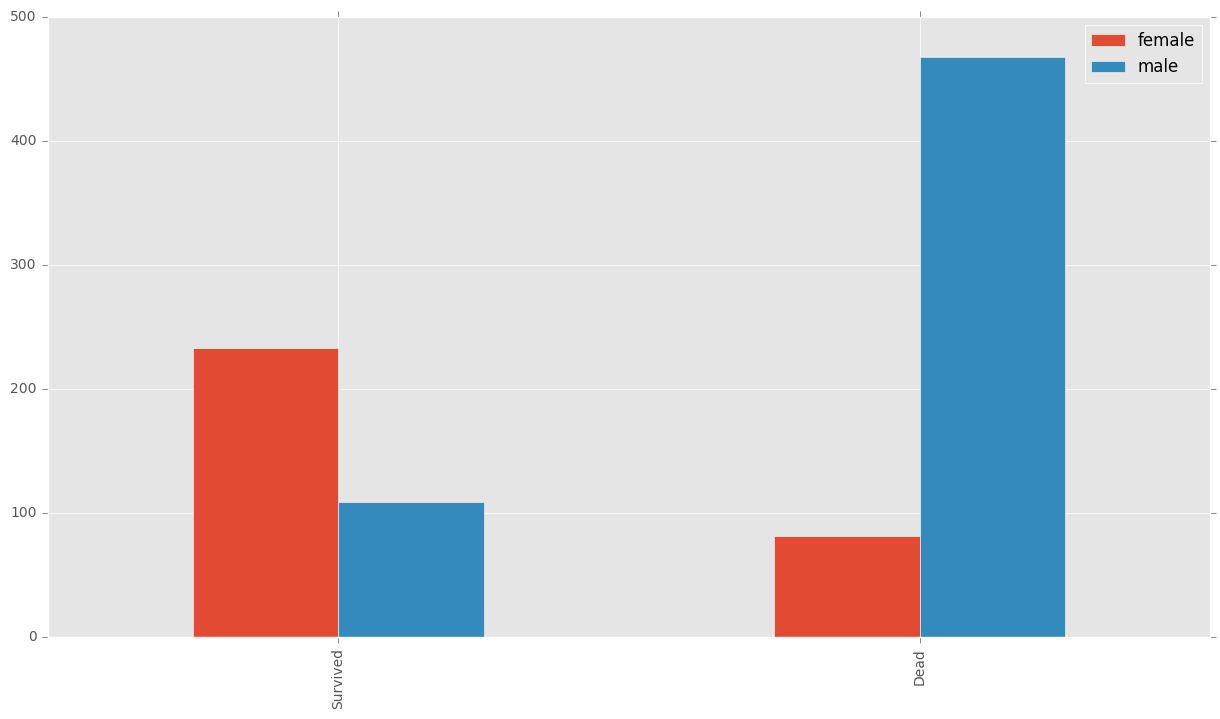

In [71]:
#plot the survived male , female and dead male,female
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', figsize=(15,8))

* It can be clearly seen from the above graph that females survied more than men. 
* Much more than men actually!
* Should the values be just 0 and 1 for male and female.. or should the diffrence be more? 

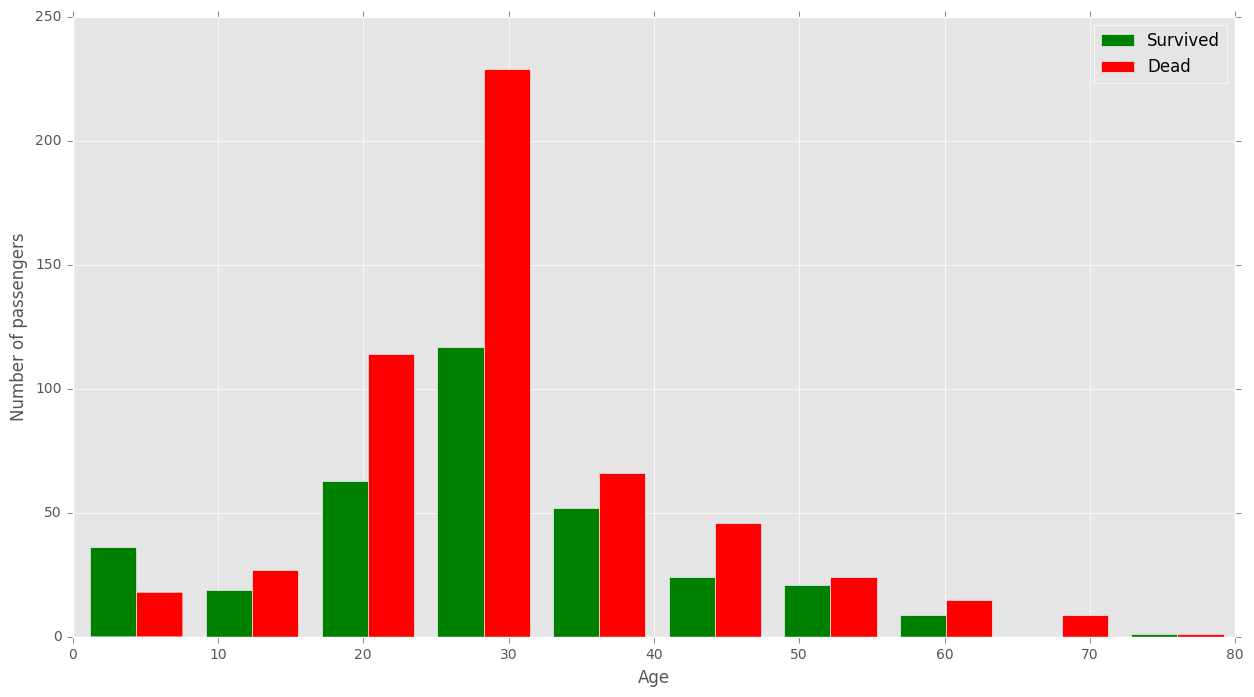

In [72]:
# dead and survived based on age of people
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

* what can be seen here is.. 
* those in the range 20-40 are more likely to be dead.
* those in teh range 70-80 are almost always dead
* 0-20 there is not much diff i think
* making these as features would be a good idea?


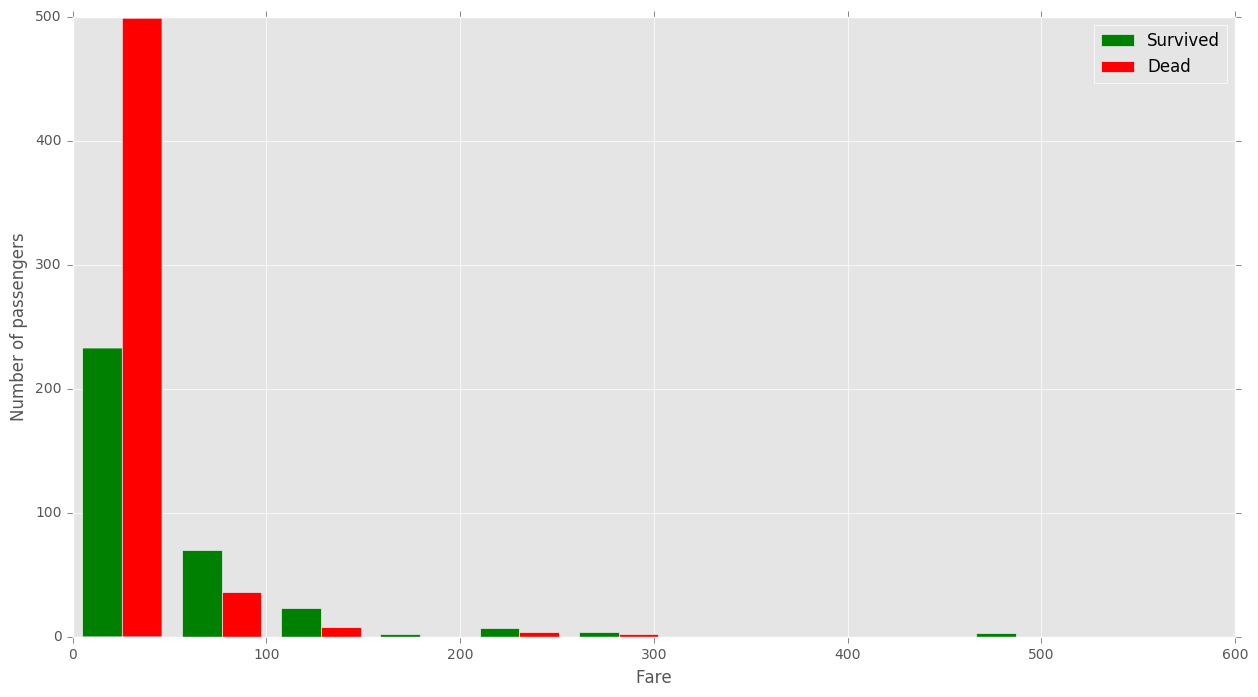

In [73]:
# plotting number of survivors based on the fare they gave
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

* Not exactly sure whether making <50 a feature will be a good idea? Although people less than 50 have high death rate!!
* But over the complete data set we cannot say anything substancial from the fare alone

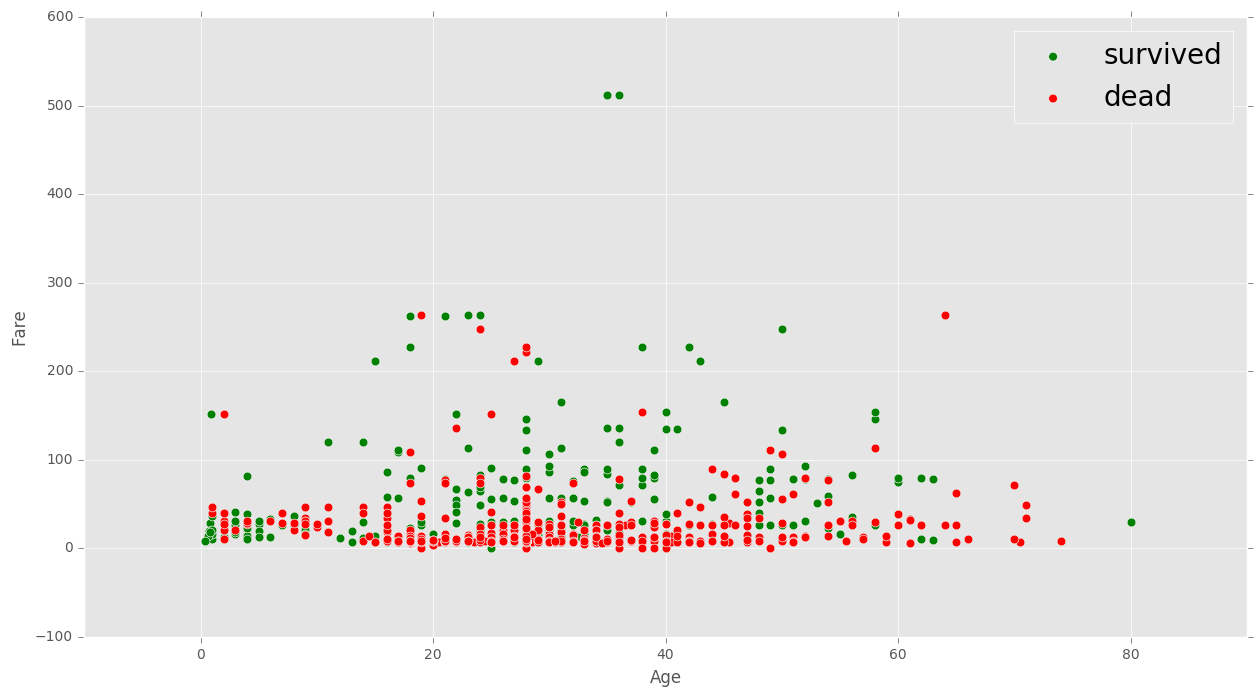

In [74]:
# depending upon age the rate of survival
# clearly see that, lower part of reds and above part is green suggesting... lower fares were killed early!
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],datab
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=20,)

* Now i know that indivisually age between 20-40 are killed more.
* Also i know indivisually those with lower fares are also killed more.
* <font color="red">Should i have indivisual features of these? or should i combine both into single feature and that will be better predictor?</font>

([array([ 136.,    0.,    0.,    0.,    0.,   87.,    0.,    0.,    0.,  119.]),
  array([  80.,    0.,    0.,    0.,    0.,   97.,    0.,    0.,    0.,  372.])],
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 2 Lists of Patches objects>)

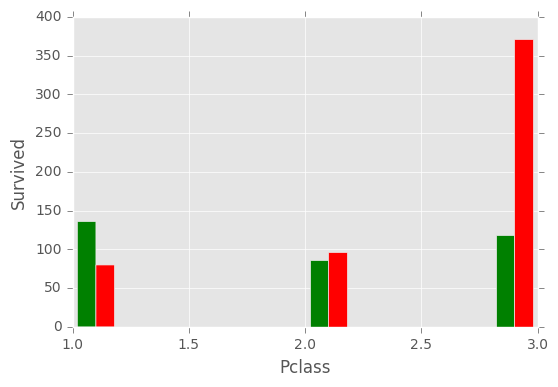

In [119]:
ax = plt.subplot()
ax.set_ylabel('Survived')
ax.set_xlabel('Pclass')
ax.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']],color = ['g','r'],)

* So from the above we see pclass3 is mostly dead. Other classes are not giving much info.

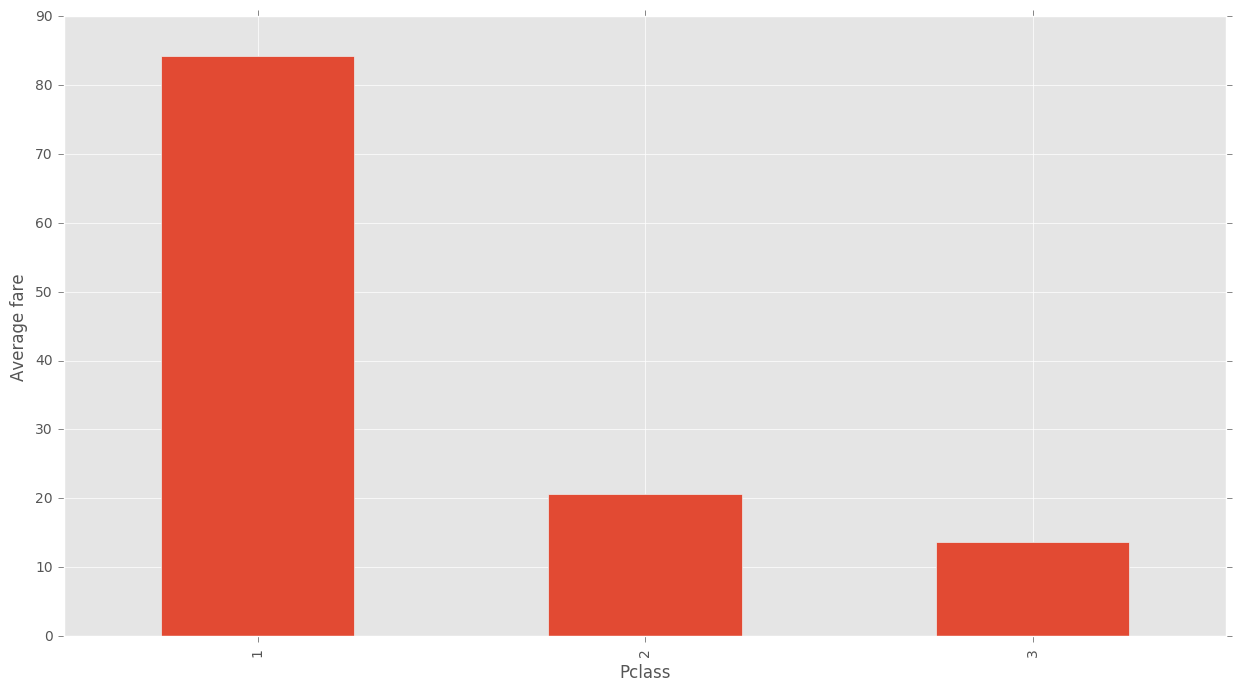

In [125]:
# Plotting how fares versus pclass goes?
ax = plt.subplot()
ax.set_ylabel('Average fare')
# we are plotting the mean cause the mean would show overall co-relation 
#rather than indivisual data points which may be unclear
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

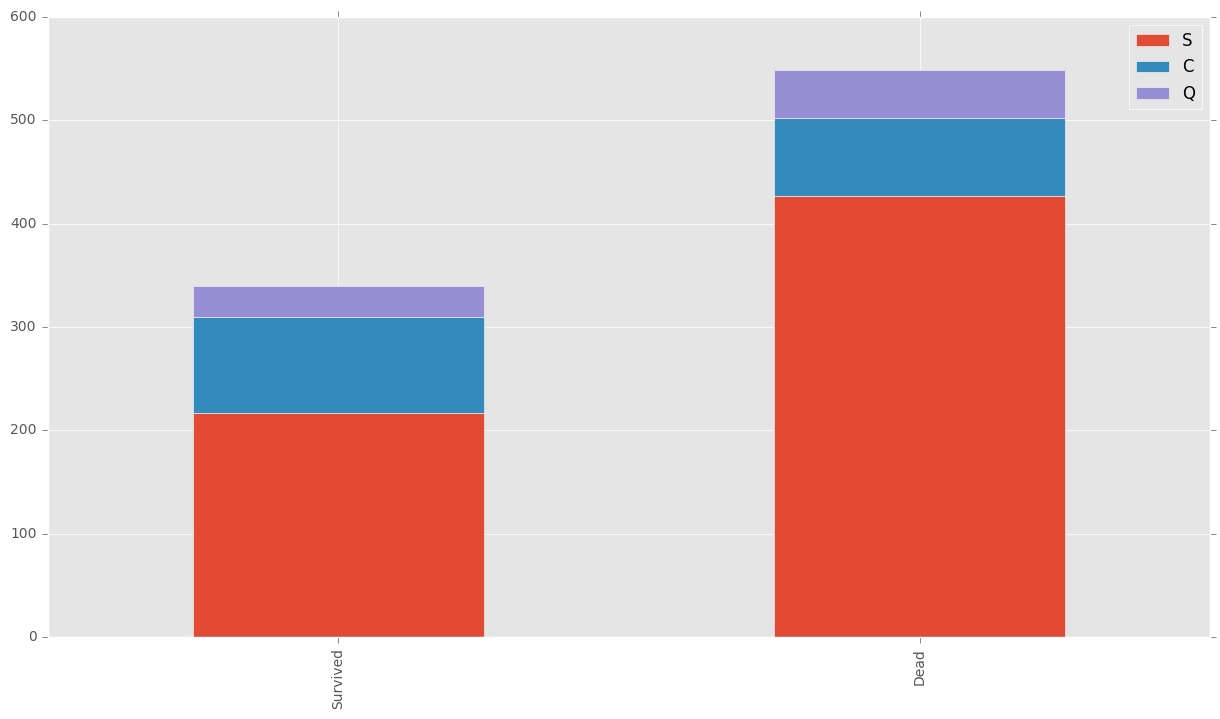

In [77]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

# Feature engineering

In [126]:
def status(feature):
    print 'Processing',feature,': ok'

In [127]:
# Combined training and test data
# This can be easily broken back to train and test easily
def get_combined_data():
    train = pd.read_csv(base_folder + 'train.csv')
    test = pd.read_csv(base_folder + 'test.csv')
    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    return combined
combined = get_combined_data()

In [131]:
def get_titles(data):
    global combined
    # we extract the title from each name
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    data['Title'] = data.Title.map(Title_Dictionary)
get_titles(data)

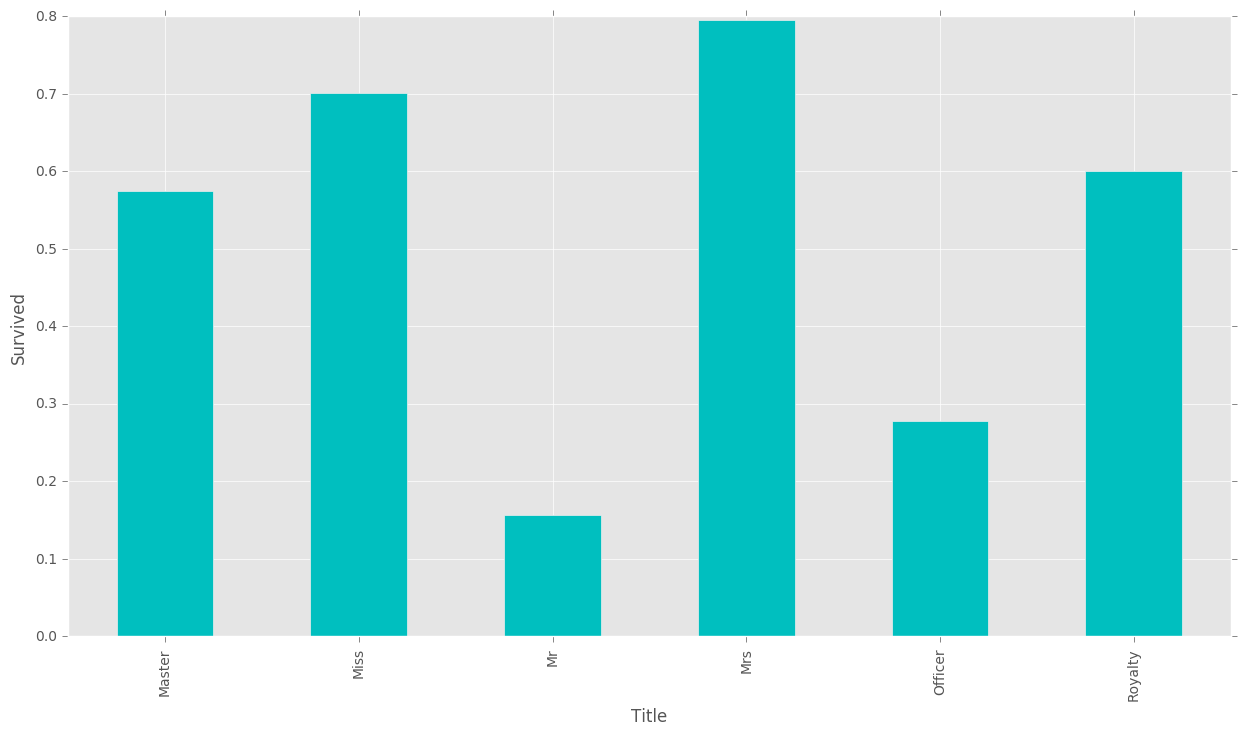

In [141]:
ax = plt.subplot()
ax.set_ylabel('Survived')
ax.set_xlabel('Title')
ax.hist([])
data.groupby('Title').mean()['Survived'].plot(kind='bar', figsize=(15,8), ax=ax,color=['c'])

In [129]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,20-40,70-80,below-80,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,0.000037,0.000000,0.018875,0.023939,0.0,0.003258,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.0,0.0,0.188982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.022465,0.000000,0.047836,0.0
1,0.000073,0.046324,0.032602,0.023939,0.0,0.032031,0.036179,0.0,0.028976,0.060858,0.0,0.000000,0.0,0.0,0.103142,0.0,0.0,0.0,0.0,0.0,0.000000,0.055641,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.022465,0.000000,0.047836,0.0
2,0.000110,0.046324,0.022306,0.000000,0.0,0.003561,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.377964,0.0,0.0,0.0,0.0,0.000000,0.011232,0.035578,0.000000,0.0
3,0.000146,0.046324,0.030028,0.023939,0.0,0.023861,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.103142,0.0,0.0,0.0,0.0,0.0,0.000000,0.055641,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.032325,0.022465,0.000000,0.047836,0.0
4,0.000183,0.000000,0.030028,0.000000,0.0,0.003617,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.032325,0.011232,0.035578,0.000000,0.0


In [83]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

In [145]:

def process_age():
    global combined
    # fill the missing ages with the median value just calculated
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')
process_age()

Processing age : ok


In [144]:
def split_age():
    # new columns m planning to create are age ranges
    # 10-20, 20-30 something like that
    combined['20-40'] = combined['Age'].apply(lambda x: 1 if x>=20 and x<=40 else 0)
    combined['70-80'] = combined['Age'].apply(lambda x: 1 if x>=70 and x<=80 else 0)
def split_fare():
    # new columns m planning to create are age ranges
    # 10-20, 20-30 something like that
    combined['below-80'] = combined['Fare'].apply(lambda x: 1 if x<80 else 0)
split_fare()
split_age()

In [88]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')
    
process_names()

Processing names : ok


In [90]:
def process_fares():
    global combined
    combined.Fare.fillna(combined.Fare.mean(),inplace=True)    
    status('fare')
process_fares()

Processing fare : ok


In [92]:
def process_embarked():
    global combined
    combined.Embarked.fillna('S',inplace=True)
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')
process_embarked()

Processing embarked : ok


In [93]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    combined = pd.concat([combined,cabin_dummies],axis=1)
    
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')
process_cabin()

Processing cabin : ok


In [94]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
20-40          1309 non-null int64
70-80          1309 non-null int64
below-80       1309 non-null int64
Embarked_C     1309 non-null float64
Embarked_Q     1309 non-null float64
Embarked_S     1309 non-null float64
Cabin_A        1309 non-null float64
Cabin_B        1309 non-null float64
Cabin_C        1309 non-null float64
Cabin_D        1309 non-null float64
Cabin_E        1309 non-null float64
Cabin_F        1309 non-null float64
Cabin_G        1309 non-null float64
Cabin_T        1309 non-null float64
Cabin_U        1309 non-null float64
dtypes: float64(14), int64(7), object(2)
memory usage: 235

In [95]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':0,'female':2})
    
    status('sex')
process_sex()

Processing sex : ok


In [96]:
def process_pclass():
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')
process_pclass()

Processing pclass : ok


In [97]:
def process_ticket():    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)
    status('ticket')

process_ticket()

Processing ticket : ok


In [146]:
def process_family():
    global combined
    # introducing a new feature
    #the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')
process_family()

Processing family : ok


# Shortcomings
* Added many features without knowing whether it will help or not?
* Like family size, titile etc...

### Better idea
* If merging of both the trainig and test is required for cross validation, do it in the beginning itself!
* Name all methods where there is transformation of data to __transform__ what function does
* 

## Normalising all features

In [100]:
def scale_all_features():
    global combined
    columns = combined.columns
    combined = pd.DataFrame(preprocessing.normalize(combined, axis=0), columns=columns )
    print 'Features scaled successfully !'
scale_all_features()

Features scaled successfully !


### Final data going into model

In [101]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,20-40,70-80,below-80,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,0.000037,0.000000,0.018875,0.023939,0.0,0.003258,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.0,0.0,0.188982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.022465,0.000000,0.047836,0.0
1,0.000073,0.046324,0.032602,0.023939,0.0,0.032031,0.036179,0.0,0.028976,0.060858,0.0,0.000000,0.0,0.0,0.103142,0.0,0.0,0.0,0.0,0.0,0.000000,0.055641,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.022465,0.000000,0.047836,0.0
2,0.000110,0.046324,0.022306,0.000000,0.0,0.003561,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.377964,0.0,0.0,0.0,0.0,0.000000,0.011232,0.035578,0.000000,0.0
3,0.000146,0.046324,0.030028,0.023939,0.0,0.023861,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.103142,0.0,0.0,0.0,0.0,0.0,0.000000,0.055641,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.032325,0.022465,0.000000,0.047836,0.0
4,0.000183,0.000000,0.030028,0.000000,0.0,0.003617,0.036179,0.0,0.028976,0.000000,0.0,0.033041,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.032325,0.011232,0.035578,0.000000,0.0


# Accuracy

In [102]:
train0 = pd.read_csv(base_folder + 'train.csv')

In [103]:
def recover_train_test_target():
    global combined
    train0 = pd.read_csv(base_folder + 'train.csv')
    targets = train0.Survived
    train = combined[0:891]
    test = combined[891:]
    return train,test,targets
train,test,targets = recover_train_test_target()

## Feature selection

In [104]:
clf = RandomForestClassifier()
clf = clf.fit(train, targets)

In [105]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [106]:
features.sort(['importance'],ascending=False)

/home/nbcommon/anaconda2_410/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
5,Fare,0.164376
2,Age,0.159521
1,Sex,0.156130
0,PassengerId,0.152339
23,Pclass_3,0.041725
6,20-40,0.030177
61,FamilySize,0.021236
3,SibSp,0.021205
4,Parch,0.020210
9,Embarked_C,0.017297


In [107]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891, 13)

In [108]:
test_new = model.transform(test)

# Model

In [109]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.82379349046
Best parameters: {'n_estimators': 240, 'criterion': 'gini', 'max_depth': 4}


### Model Improvement

# Output

In [47]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)

In [ ]:
%%bash
curl --upload-file ./output.csv https://transfer.sh/output.csv

In [48]:
%%bash
pip install kaggle-cli
kg submit output.csv -c titanic -u sp4658@nyu.edu -p shivi2909 -m "submission"

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

